## To start this exercise, pick a dataset. It could be one you've worked with before or it could be a new dataset. Then build the best decision tree that you can.

## Hopefully, out of this you'll see the power of random forests, but you'll also see their potential costs. Remember, in the real world, you won't necessarily be dealing with thousands of rows. There may be millions, billions, or even more.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import ensemble
from sklearn.model_selection import cross_val_score

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

## Now, try to match that with the simplest random forest that you can. For this exercise, measure simplicity with runtime. Compare that to the runtime of the decision tree. This is imperfect, but just go with it.

In [2]:
price_df = pd.read_csv('data/houseprices.csv')

In [3]:
price_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
price_df.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
price_df.isna().sum().head(60)

id                 0
mssubclass         0
mszoning           0
lotfrontage      259
lotarea            0
street             0
alley           1369
lotshape           0
landcontour        0
utilities          0
lotconfig          0
landslope          0
neighborhood       0
condition1         0
condition2         0
bldgtype           0
housestyle         0
overallqual        0
overallcond        0
yearbuilt          0
yearremodadd       0
roofstyle          0
roofmatl           0
exterior1st        0
exterior2nd        0
masvnrtype         8
masvnrarea         8
exterqual          0
extercond          0
foundation         0
bsmtqual          37
bsmtcond          37
bsmtexposure      38
bsmtfintype1      37
bsmtfinsf1         0
bsmtfintype2      38
bsmtfinsf2         0
bsmtunfsf          0
totalbsmtsf        0
heating            0
heatingqc          0
centralair         0
electrical         1
firstflrsf         0
secondflrsf        0
lowqualfinsf       0
grlivarea          0
bsmtfullbath 

In [6]:
price_df = price_df.drop(columns=['id', 'alley', 'lotfrontage', 'fireplacequ', 'poolqc', 'fence', 'miscfeature', 'miscval',
                                 'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf','enclosedporch', 'threessnporch', 
                                  'screenporch', 'poolarea', 'poolqc','fence', 'miscfeature', 'miscval', 'mosold', 
                                  'yrsold', 'saletype', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 
                                 'openporchsf', 'condition2', 'extercond', 'foundation', 'bsmtcond'])

In [7]:
price_df = price_df.dropna()

In [8]:
price_df.columns

Index(['mssubclass', 'mszoning', 'lotarea', 'street', 'lotshape',
       'landcontour', 'utilities', 'lotconfig', 'landslope', 'neighborhood',
       'condition1', 'bldgtype', 'housestyle', 'overallqual', 'overallcond',
       'yearbuilt', 'yearremodadd', 'masvnrtype', 'masvnrarea', 'exterqual',
       'bsmtqual', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1', 'totalbsmtsf',
       'heating', 'heatingqc', 'centralair', 'electrical', 'firstflrsf',
       'secondflrsf', 'lowqualfinsf', 'grlivarea', 'bsmtfullbath',
       'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr',
       'kitchenqual', 'totrmsabvgrd', 'functional', 'fireplaces', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'paveddrive', 'wooddecksf', 'salecondition', 'saleprice'],
      dtype='object')

In [9]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1339 entries, 0 to 1459
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mssubclass     1339 non-null   int64  
 1   mszoning       1339 non-null   object 
 2   lotarea        1339 non-null   int64  
 3   street         1339 non-null   object 
 4   lotshape       1339 non-null   object 
 5   landcontour    1339 non-null   object 
 6   utilities      1339 non-null   object 
 7   lotconfig      1339 non-null   object 
 8   landslope      1339 non-null   object 
 9   neighborhood   1339 non-null   object 
 10  condition1     1339 non-null   object 
 11  bldgtype       1339 non-null   object 
 12  housestyle     1339 non-null   object 
 13  overallqual    1339 non-null   int64  
 14  overallcond    1339 non-null   int64  
 15  yearbuilt      1339 non-null   int64  
 16  yearremodadd   1339 non-null   int64  
 17  masvnrtype     1339 non-null   object 
 18  masvnrar

In [10]:
dum_price = price_df.copy()

one_hot = pd.DataFrame()
cat_cols = list(dum_price.select_dtypes(include=['object']).columns)
for col in cat_cols:
    new_col = 'd_' + col
    dum_price[col] = pd.Categorical(dum_price[col])
    dum_price[new_col] = dum_price[col].cat.codes
    
#     # Get one hot encoding of columns
#     one_hot = pd.get_dummies(dum_price[ccol])
#     one_hot.columns = [str(ccol) + '_' + str(ocol) for ocol in one_hot.columns]
#     #print(one_hot)
    
    # Drop column as it is now encoded
    dum_price = dum_price.drop(columns=col)
    
#     dum_price = dum_price.join(one_hot)
#     print('*****' + ccol + '*****')
    

In [11]:
dum_price = pd.DataFrame(dum_price)

In [12]:
dum_cols = dum_price.columns
print(dum_cols)

Index(['mssubclass', 'lotarea', 'overallqual', 'overallcond', 'yearbuilt',
       'yearremodadd', 'masvnrarea', 'bsmtfinsf1', 'totalbsmtsf', 'firstflrsf',
       'secondflrsf', 'lowqualfinsf', 'grlivarea', 'bsmtfullbath',
       'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr',
       'totrmsabvgrd', 'fireplaces', 'garageyrblt', 'garagecars', 'garagearea',
       'wooddecksf', 'saleprice', 'd_mszoning', 'd_street', 'd_lotshape',
       'd_landcontour', 'd_utilities', 'd_lotconfig', 'd_landslope',
       'd_neighborhood', 'd_condition1', 'd_bldgtype', 'd_housestyle',
       'd_masvnrtype', 'd_exterqual', 'd_bsmtqual', 'd_bsmtexposure',
       'd_bsmtfintype1', 'd_heating', 'd_heatingqc', 'd_centralair',
       'd_electrical', 'd_kitchenqual', 'd_functional', 'd_garagetype',
       'd_garagefinish', 'd_garagequal', 'd_garagecond', 'd_paveddrive',
       'd_salecondition'],
      dtype='object')


In [13]:
#xxx

## The Blind Approach

In [14]:
rfc = ensemble.RandomForestClassifier()

In [15]:
X = dum_price.drop('saleprice', 1)
Y = dum_price['saleprice']
X = pd.get_dummies(X)

In [16]:
cross_val_score(rfc, X, Y, cv=5)

array([0.02238806, 0.00746269, 0.02238806, 0.00373134, 0.01123596])

In [17]:
sel_cols = []
for i in range(0, 20):
    sel_cols.append(dum_cols[i])
    
corr1_df = dum_price[sel_cols + ['saleprice']]

sel_cols = []
for i in range(19, 40):
    sel_cols.append(dum_cols[i])
    
corr2_df = dum_price[sel_cols + ['saleprice']]

sel_cols = []
for i in range(39, 53):
    sel_cols.append(dum_cols[i])
    
corr3_df = dum_price[sel_cols + ['saleprice']]

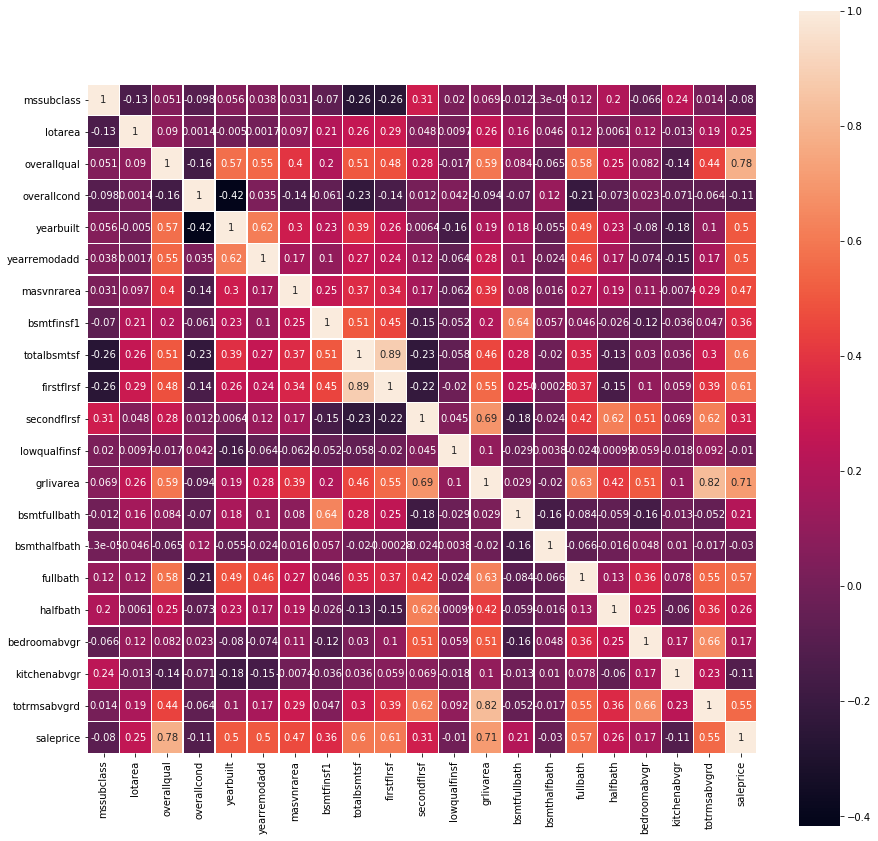

In [18]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr1_df.corr(), square=True, annot=True, linewidths=.5)
plt.show()

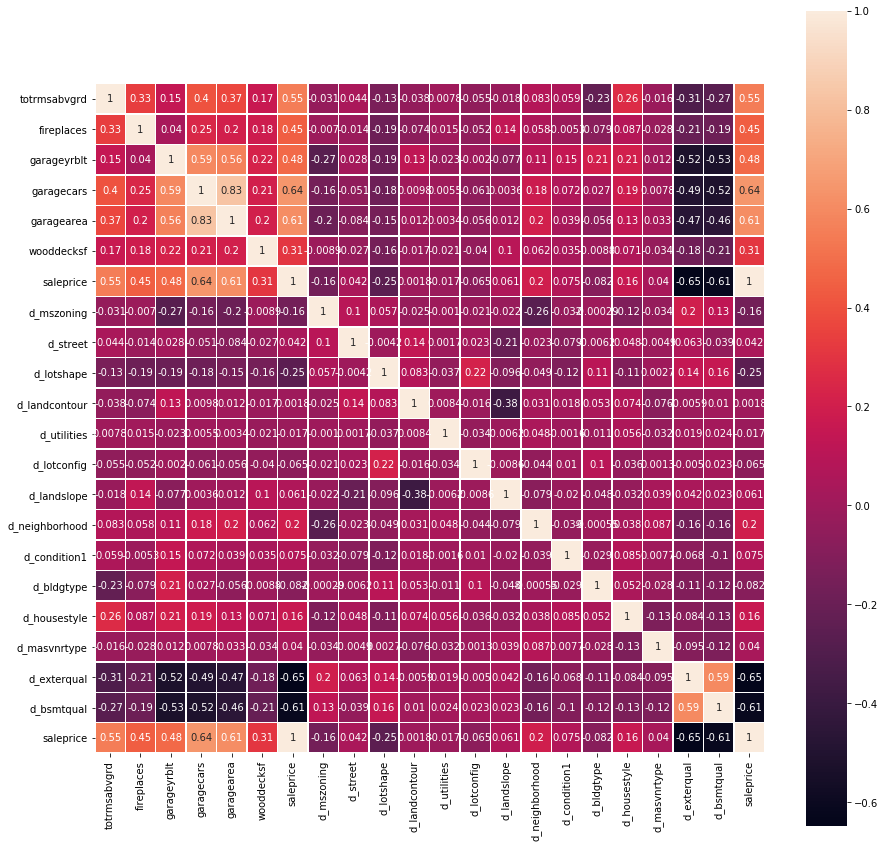

In [19]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr2_df.corr(), square=True, annot=True, linewidths=.5)
plt.show()

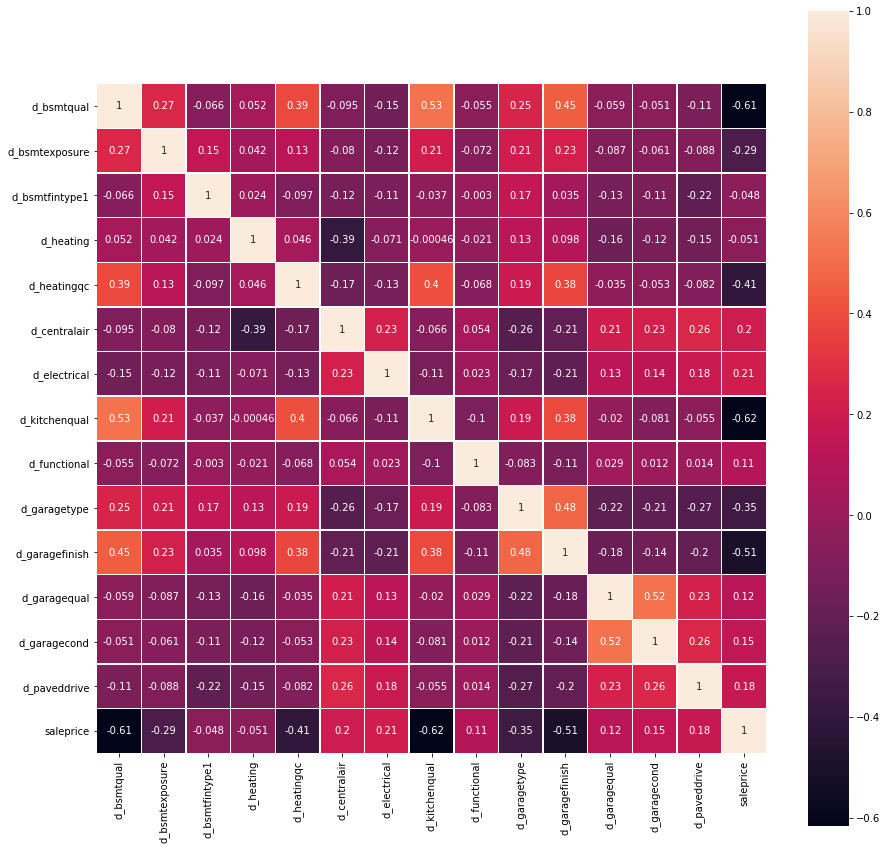

In [20]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr3_df.corr(), square=True, annot=True, linewidths=.5)
plt.show()

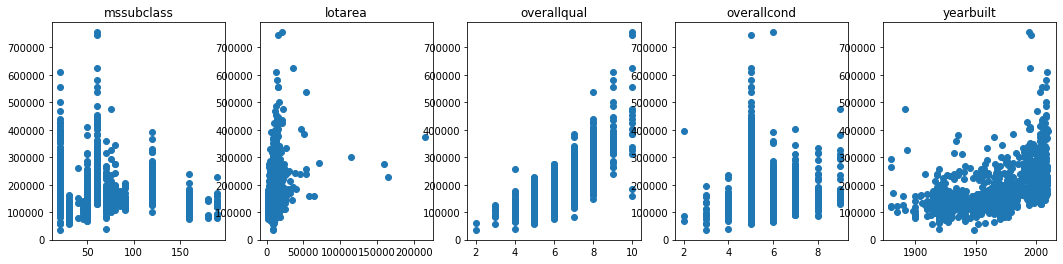

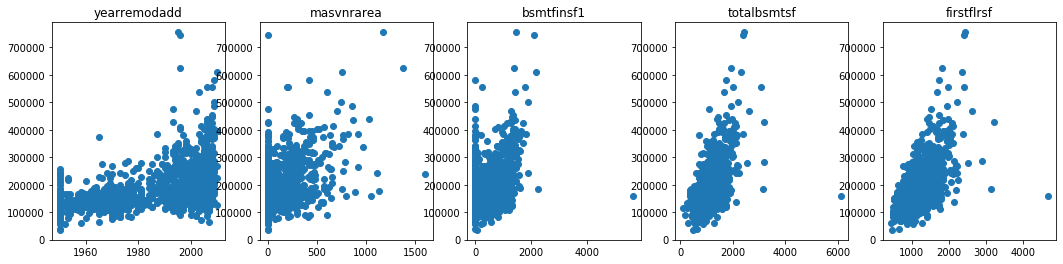

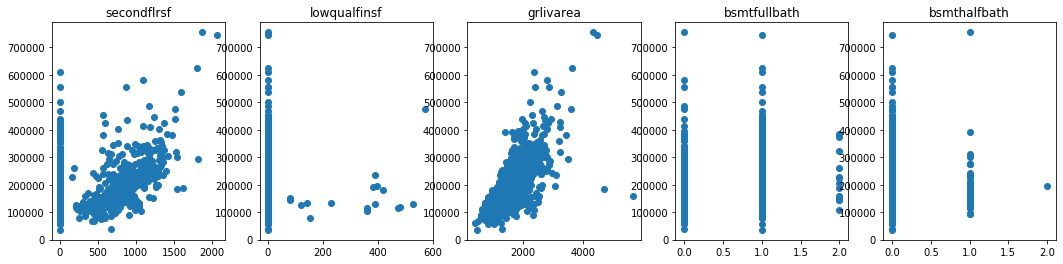

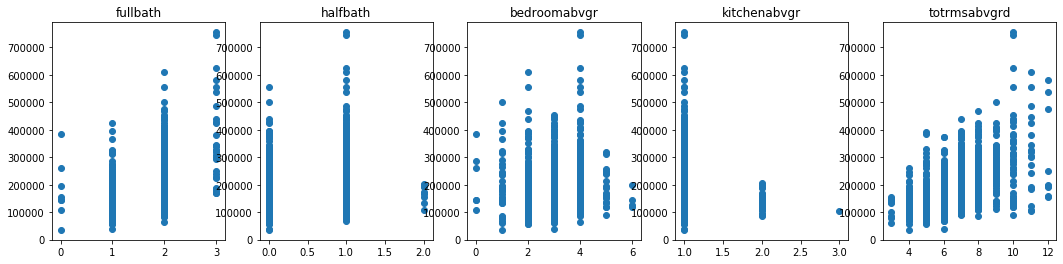

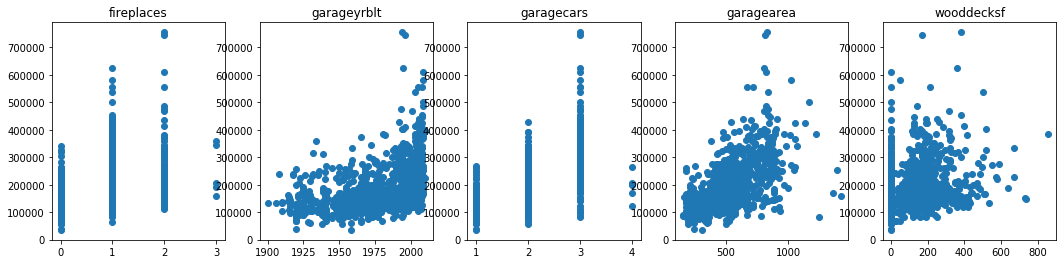

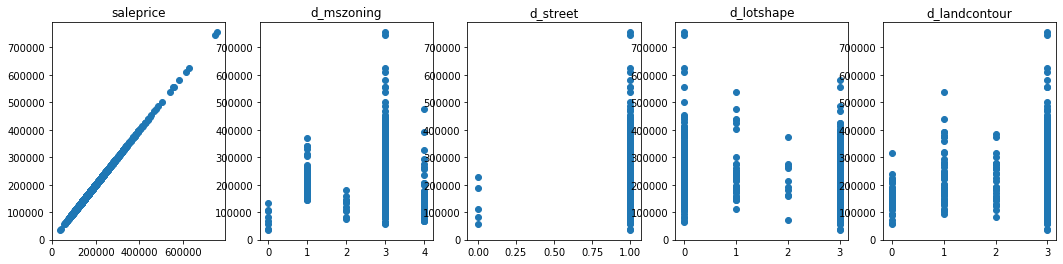

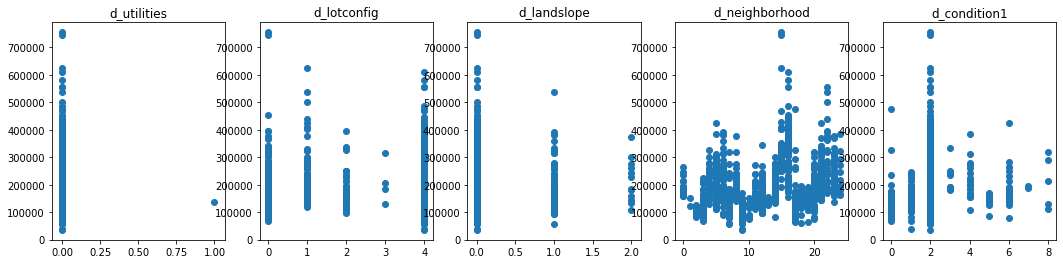

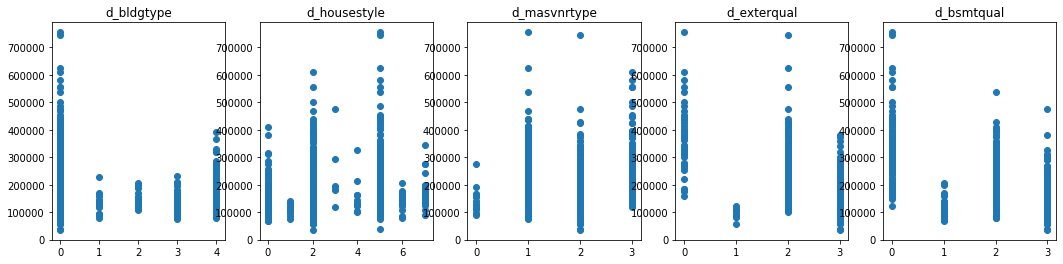

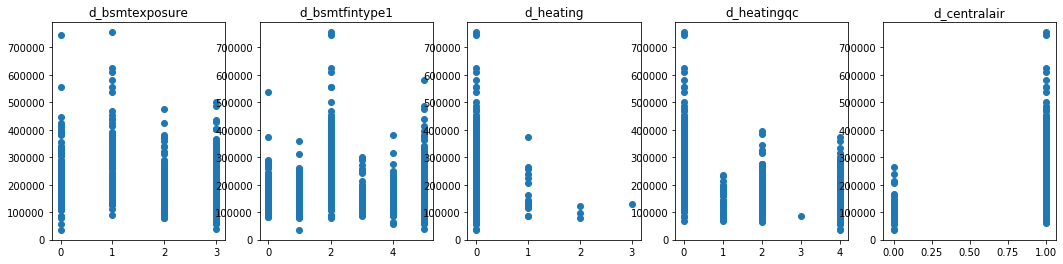

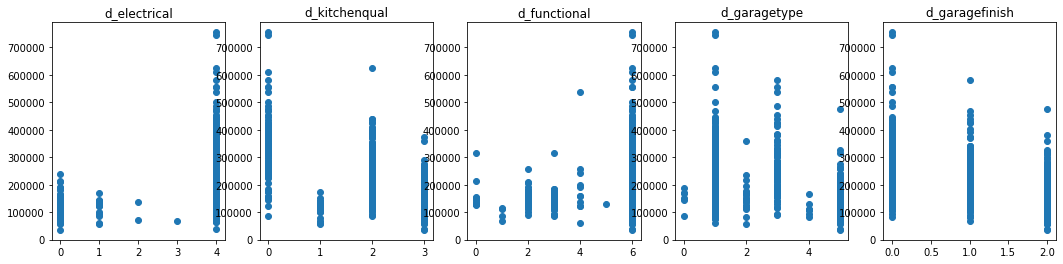

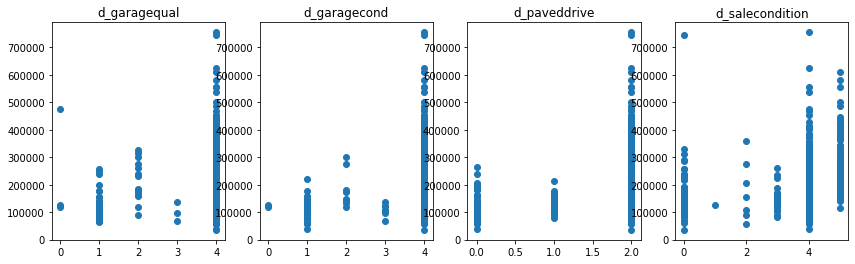

In [21]:
pcols = dum_price.columns

x = 1
plt.figure(figsize=(18,4))
for col in pcols:
    plt.subplot(1,5,x)
    plt.scatter(dum_price[col], dum_price["saleprice"])
    plt.title(col)
    
    if (x == 5):
        x = 1
        plt.show()
        plt.figure(figsize=(18,4))
    else:
        x += 1

In [22]:
dum_price.columns

Index(['mssubclass', 'lotarea', 'overallqual', 'overallcond', 'yearbuilt',
       'yearremodadd', 'masvnrarea', 'bsmtfinsf1', 'totalbsmtsf', 'firstflrsf',
       'secondflrsf', 'lowqualfinsf', 'grlivarea', 'bsmtfullbath',
       'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr',
       'totrmsabvgrd', 'fireplaces', 'garageyrblt', 'garagecars', 'garagearea',
       'wooddecksf', 'saleprice', 'd_mszoning', 'd_street', 'd_lotshape',
       'd_landcontour', 'd_utilities', 'd_lotconfig', 'd_landslope',
       'd_neighborhood', 'd_condition1', 'd_bldgtype', 'd_housestyle',
       'd_masvnrtype', 'd_exterqual', 'd_bsmtqual', 'd_bsmtexposure',
       'd_bsmtfintype1', 'd_heating', 'd_heatingqc', 'd_centralair',
       'd_electrical', 'd_kitchenqual', 'd_functional', 'd_garagetype',
       'd_garagefinish', 'd_garagequal', 'd_garagecond', 'd_paveddrive',
       'd_salecondition'],
      dtype='object')

In [23]:
rfc = ensemble.RandomForestClassifier()

In [24]:
X = dum_price[['overallqual' 
              ,'overallcond'
              ,'totalbsmtsf'
              ,'grlivarea'
              ,'fullbath'
              ,'garagecars'
              ,'d_heating'
              ,'d_centralair'
              ,'d_electrical'
              ,'d_garagecond'
             ]]
Y = dum_price['saleprice']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

In [26]:
cross_val_score(rfc, X, Y, cv=10)

array([0.02238806, 0.00746269, 0.        , 0.02238806, 0.        ,
       0.01492537, 0.        , 0.00746269, 0.00746269, 0.01503759])